In [144]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [145]:
df = pd.read_csv('car_data.csv')

In [146]:
df

,name,price,year,mileage,engine,transmission
0,Volkswagen Polo,"£3,495",2010,"83,000 miles",Diesel,Manual
1,Volkswagen Caddy,"£6,495",2011,"160,000 miles",Diesel,Manual
2,Skoda Fabia,"£4,190",2011,"51,000 miles",Petrol,Manual
3,Nissan NV200,"£4,690",2010,"107,000 miles",Diesel,Manual
4,Ford Transit,"£3,995",2005,"93,949 miles",Diesel,Manual
...,...,...,...,...,...,...
2995,Citroen C4,"£4,995",2013,"71,000 miles",Diesel,Manual
2996,BMW 1 SERIES,"£6,690",2012,"108,899 miles",Diesel,Automatic
2997,Audi A1,"£9,995",2013,"71,700 miles",Petrol,Semi auto
2998,Audi Q5,"£11,990",2009,"64,787 miles",Diesel,Automatic


In [147]:
df.head(20)

,name,price,year,mileage,engine,transmission
0,Volkswagen Polo,"£3,495",2010,"83,000 miles",Diesel,Manual
1,Volkswagen Caddy,"£6,495",2011,"160,000 miles",Diesel,Manual
2,Skoda Fabia,"£4,190",2011,"51,000 miles",Petrol,Manual
3,Nissan NV200,"£4,690",2010,"107,000 miles",Diesel,Manual
4,Ford Transit,"£3,995",2005,"93,949 miles",Diesel,Manual
5,Citroen Berlingo,"£5,985",2010,"46,000 miles",Diesel,Manual
6,Audi A4,"£4,499",2012,"138,000 miles",Diesel,Manual
7,Audi A4,"£5,999",2010,"103,000 miles",Diesel,Manual
8,MINI Hatch,"£12,495",2015,"47,074 miles",Petrol,Automatic
9,Ford Focus,"£4,495",2011,"97,289 miles",Petrol,Manual


this will give the first 20 rows from the dataset.

In [148]:
df.shape

(3000, 6)

In [149]:
df.describe()

,year
count,3000.000000
mean,2016.722667
std,3.034055
min,2000.000000
25%,2015.000000
50%,2018.000000
75%,2019.000000
max,2021.000000


In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   name          3000 non-null   object
 1   price         3000 non-null   object
 2   year          3000 non-null   int64 
 3   mileage       3000 non-null   object
 4   engine        3000 non-null   object
 5   transmission  2988 non-null   object
dtypes: int64(1), object(5)
memory usage: 140.8+ KB


In [151]:
df.isnull().sum()

name             0
price            0
year             0
mileage          0
engine           0
transmission    12
dtype: int64

There are 12 missing values in the transmission column. That is a very small number so we need to check the column to see how we can clean it

In [152]:
df[df['transmission'].isnull()]

,name,price,year,mileage,engine,transmission
239,Volkswagen T-cross,"£22,290",2021,Petrol,Manual,NaN
242,Volkswagen UP,"£14,490",2021,Petrol,Manual,NaN
248,Volkswagen Polo,"£22,000",2021,Petrol,Automatic,NaN
251,Volkswagen Golf,"£28,490",2021,Petrol,Automatic,NaN
252,Volkswagen Golf,"£28,490",2021,Petrol,Automatic,NaN
421,MINI Hatch,"£10,495",2012,Petrol,Manual,NaN
1189,TOYOTA AURIS,"£11,790",2017,"147,000 miles",Automatic,NaN
1219,NISSAN LEAF,"£8,395",2014,"33,000 miles",Automatic,NaN
1273,KIA NIRO,"£16,490",2017,"50,500 miles",Automatic,NaN
1338,BMW 3 SERIES,"£16,989",2016,"62,000 miles",Automatic,NaN


The rows with null values are small and look inconsistent, so it is best we delete it

In [153]:
df= df.dropna()
df.shape

(2988, 6)

12 rows have been deleted which is less than approx 1% of the total data.

In [154]:
df = df.drop_duplicates(keep= 'first', inplace=False)

In [155]:
df.shape

(2979, 6)

In [156]:
df['manufacturer'] = df['name'].apply(lambda x: x.split(' ')[0])
df['manufacturer'].head()

0    Volkswagen
1    Volkswagen
2         Skoda
3        Nissan
4          Ford
Name: manufacturer, dtype: object

In [157]:
df.manufacturer.nunique()

70

In [158]:
df.manufacturer.unique()

array(['Volkswagen', 'Skoda', 'Nissan', 'Ford', 'Citroen', 'Audi', 'MINI',
       'Peugeot', 'Vauxhall', 'BMW', 'Toyota', 'Land', 'Mercedes-Benz',
       'Honda', 'SKODA', 'Mazda', 'DS', 'Infiniti', 'Volvo', 'Ssangyong',
       'Mitsubishi', 'Mini', 'MG', 'Kia', 'Jaguar', 'Hyundai', 'Fiat',
       'Alfa', 'HYUNDAI', 'SEAT', 'VAUXHALL', 'NISSAN', 'DACIA', 'VOLVO',
       'HONDA', 'RENAULT', 'AUDI', 'LEXUS', 'MERCEDES-BENZ', 'Mercedes',
       'Isuzu', 'FORD', 'Suzuki', 'Dacia', 'Abarth', 'Renault', 'Jeep',
       'Mercedes-benz', 'CHRYSLER', 'FIAT', 'Subaru', 'Saab', 'Porsche',
       'Lexus', 'VOLKSWAGEN', 'TOYOTA', 'SUZUKI', 'SSANGYONG', 'SAAB',
       'PEUGEOT', 'MITSUBISHI', 'MAZDA', 'LAND', 'KIA', 'JAGUAR',
       'CITROEN', 'Smart', 'ABARTH', 'Seat', 'Bmw'], dtype=object)

We will clean these data by making similar maufacturers uniform.

In [159]:
df = df.replace({'manufacturer' : 
            {'MAZDA' : 'Mazda', 'JAGUAR':'Jaguar', 'AUDI' : 'Audi', 'NISSAN': 'Nissan', 'MINI': 'Mini', 
             'VOLKSWAGEN':'Volkswagen', 'VAUXHALL':'Vauxhall', 'TOYOTA':'Toyota', 'SKODA':'Skoda', 'FORD':'Ford',
             'Bmw':'BMW','SUZUKI' : 'Suzuki', 'RENAULT':'Renault', 'PEUGEOT':'Peugeot', 'CITROEN':'Citroen',
             'VOLVO':'Volvo', 'FIAT':'Fiat', 'Ds':'DS', 'DACIA':'Dacia', 'ABARTH':'Abarth', 'SMART':'Smart', 
             'smart':'Smart','SEAT':'Seat', 'MITSUBISHI':'Mitsubishi', 'KIA':'Kia', 'HYUNDAI':'Hyundai',
             'HONDA':'Honda','MASERATI':'Maserati', 'PORSCHE':'Porsche', 'INFINITI':'Infiniti', 'Alfa':'Alfa-Romero',
             'Mercedes': 'Mercedes-Benz', 'MERCEDES-BENZ': 'Mercedes-Benz', 'Mercedes-benz': 'Mercedes-Benz',
             'Land':'Land-Rover', 'LAND': 'Land-Rover'}
             })

print(df.manufacturer.unique())
print('\n')
print('There are ' + str(df.manufacturer.nunique()) + ' different car manufacturers in the dataset')

['Volkswagen' 'Skoda' 'Nissan' 'Ford' 'Citroen' 'Audi' 'Mini' 'Peugeot'
 'Vauxhall' 'BMW' 'Toyota' 'Land-Rover' 'Mercedes-Benz' 'Honda' 'Mazda'
 'DS' 'Infiniti' 'Volvo' 'Ssangyong' 'Mitsubishi' 'MG' 'Kia' 'Jaguar'
 'Hyundai' 'Fiat' 'Alfa-Romero' 'Seat' 'Dacia' 'Renault' 'LEXUS' 'Isuzu'
 'Suzuki' 'Abarth' 'Jeep' 'CHRYSLER' 'Subaru' 'Saab' 'Porsche' 'Lexus'
 'SSANGYONG' 'SAAB' 'Smart']


There are 42 different car manufacturers in the dataset


In [160]:
df['price'] = df['price'].str.replace(',', '').str.replace('£', '').astype(np.int64)
df['price'].head()

0    3495
1    6495
2    4190
3    4690
4    3995
Name: price, dtype: int64

In [161]:
df['year']=df['year'].astype(str).astype(np.int64)

In [162]:
Current_Year = 2021

In [163]:
df['age'] = Current_Year - df['year']

In [164]:
df['age'] = df['age'].astype(np.int64)

In [165]:
df['age'].head()

0    11
1    10
2    10
3    11
4    16
Name: age, dtype: int64

In [166]:
df['mileage'] = df['mileage'].str.replace(',', '').str.replace(' ', '').str.replace('miles', '').astype(np.int64)
df['mileage'].head()

0     83000
1    160000
2     51000
3    107000
4     93949
Name: mileage, dtype: int64

In [167]:
df['engine'].unique()


array(['Diesel', 'Petrol', 'Hybrid', 'Electric', 'Plug_in_hybrid',
       'Hybrid electric', 'Petrol hybrid', 'Petrol plugin hybrid',
       'Petrol/electric hybr', 'Petrol/electric', 'Petrol/plugin elec h',
       'Petrol plug-in hybri', 'Unlisted', 'Petrol / electric hy',
       'Diesel hybrid'], dtype=object)

In [168]:
df = df.replace({'engine' : 
                     {'Petrol hybrid': 'Hybrid', 'Petrol hybrid': 'Hybrid', 
                      'Petrol / electric hy' : 'Hybrid', 'Petrol plug-in hybri': 'Plug_in_hybrid',
                     'Petrol/electric' : 'Hybrid'}
                     })
df['engine'].unique()

array(['Diesel', 'Petrol', 'Hybrid', 'Electric', 'Plug_in_hybrid',
       'Hybrid electric', 'Petrol plugin hybrid', 'Petrol/electric hybr',
       'Petrol/plugin elec h', 'Unlisted', 'Diesel hybrid'], dtype=object)

In [169]:
df['transmission'].unique()

array(['Manual', 'Automatic', 'Semi auto', 'Cvt', 'Unlisted',
       'Semi automatic', 'Other', 'Semiauto'], dtype=object)

In [170]:
df = df.replace({'transmission' : 
                     {'Semi auto': 'Semiautomatic', 'Semiauto': 'Semiautomatic',
                      'Semi automatic': 'Semiautomatic', 'Manual ': 'Manual',
                      'Semi-automatic': 'Semiautomatic', 'G-tronic+': 'Automatic',
                      'Cvt': 'Automatic'}
                     
                     })

we have to Reorder the columns to make the dataframe easy to understand

In [171]:
df = df[['name', 'manufacturer', 'year', 'age', 'mileage', 'engine', 'transmission', 'price']]
df.head()

,name,manufacturer,year,age,mileage,engine,transmission,price
0,Volkswagen Polo,Volkswagen,2010,11,83000,Diesel,Manual,3495
1,Volkswagen Caddy,Volkswagen,2011,10,160000,Diesel,Manual,6495
2,Skoda Fabia,Skoda,2011,10,51000,Petrol,Manual,4190
3,Nissan NV200,Nissan,2010,11,107000,Diesel,Manual,4690
4,Ford Transit,Ford,2005,16,93949,Diesel,Manual,3995


In [172]:
df.shape

(2979, 8)

In [173]:
df.to_csv('cleaned_car_df.csv', index = False)

In [174]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set_theme()

In [175]:
df = pd.read_csv('cleaned_car_df.csv')
df.head()

,name,manufacturer,year,age,mileage,engine,transmission,price
0,Volkswagen Polo,Volkswagen,2010,11,83000,Diesel,Manual,3495
1,Volkswagen Caddy,Volkswagen,2011,10,160000,Diesel,Manual,6495
2,Skoda Fabia,Skoda,2011,10,51000,Petrol,Manual,4190
3,Nissan NV200,Nissan,2010,11,107000,Diesel,Manual,4690
4,Ford Transit,Ford,2005,16,93949,Diesel,Manual,3995


In [176]:
df.nlargest(5, 'price')

,name,manufacturer,year,age,mileage,engine,transmission,price
439,Mazda MX-5,Mazda,2019,2,7170,Petrol,Manual,30000
989,Land Rover Range Rover Sport,Land-Rover,2014,7,58000,Diesel,Automatic,30000
1538,Hyundai i30,Hyundai,2020,1,4250,Petrol,Manual,30000
2697,Ford Ranger,Ford,2018,3,51325,Diesel,Automatic,30000
2903,Audi Q3,Audi,2018,3,13780,Diesel,Semiautomatic,30000


thses are 5 topmost expensive cars in the collection from the dataset.

In [177]:
df.nlargest(5, 'mileage')

,name,manufacturer,year,age,mileage,engine,transmission,price
1687,PEUGEOT PARTNER,Peugeot,2012,9,200200,Diesel,Manual,3495
15,Ford Transit Connect,Ford,2016,5,188500,Diesel,Manual,5000
34,Honda CR-V,Honda,2012,9,178375,Diesel,Manual,4000
1338,AUDI TT,Audi,2009,12,170701,Diesel,Manual,5999
1756,Renault Trafic,Renault,2014,7,166000,Diesel,Manual,5995


these are 5 topmost cars as per mileage from the datacollection.

In [178]:
df.nlargest(5, 'age')

,name,manufacturer,year,age,mileage,engine,transmission,price
621,BMW Z3,BMW,2000,21,67000,Petrol,Manual,4490
956,Mercedes-Benz M Class,Mercedes-Benz,2003,18,96603,Diesel,Automatic,4150
1688,MITSUBISHI SHOGUN,Mitsubishi,2004,17,91500,Diesel,Manual,6950
4,Ford Transit,Ford,2005,16,93949,Diesel,Manual,3995
965,Mercedes-Benz C Class,Mercedes-Benz,2005,16,112000,Diesel,Automatic,3495


these are top 5 oldest cars as per age wise datacollection.

In [179]:
df.head()

,name,manufacturer,year,age,mileage,engine,transmission,price
0,Volkswagen Polo,Volkswagen,2010,11,83000,Diesel,Manual,3495
1,Volkswagen Caddy,Volkswagen,2011,10,160000,Diesel,Manual,6495
2,Skoda Fabia,Skoda,2011,10,51000,Petrol,Manual,4190
3,Nissan NV200,Nissan,2010,11,107000,Diesel,Manual,4690
4,Ford Transit,Ford,2005,16,93949,Diesel,Manual,3995


thses are first 5 rows of the dataset.

In [180]:
corr = df.corr()
corr

,year,age,mileage,price
year,1.000000,-1.000000,-0.746760,0.634482
age,-1.000000,1.000000,0.746760,-0.634482
mileage,-0.746760,0.746760,1.000000,-0.500562
price,0.634482,-0.634482,-0.500562,1.000000


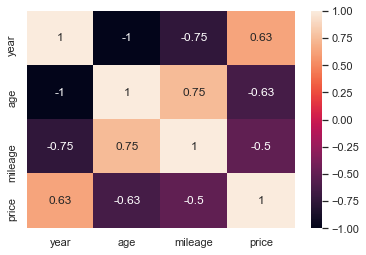

In [181]:
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns, annot=True);

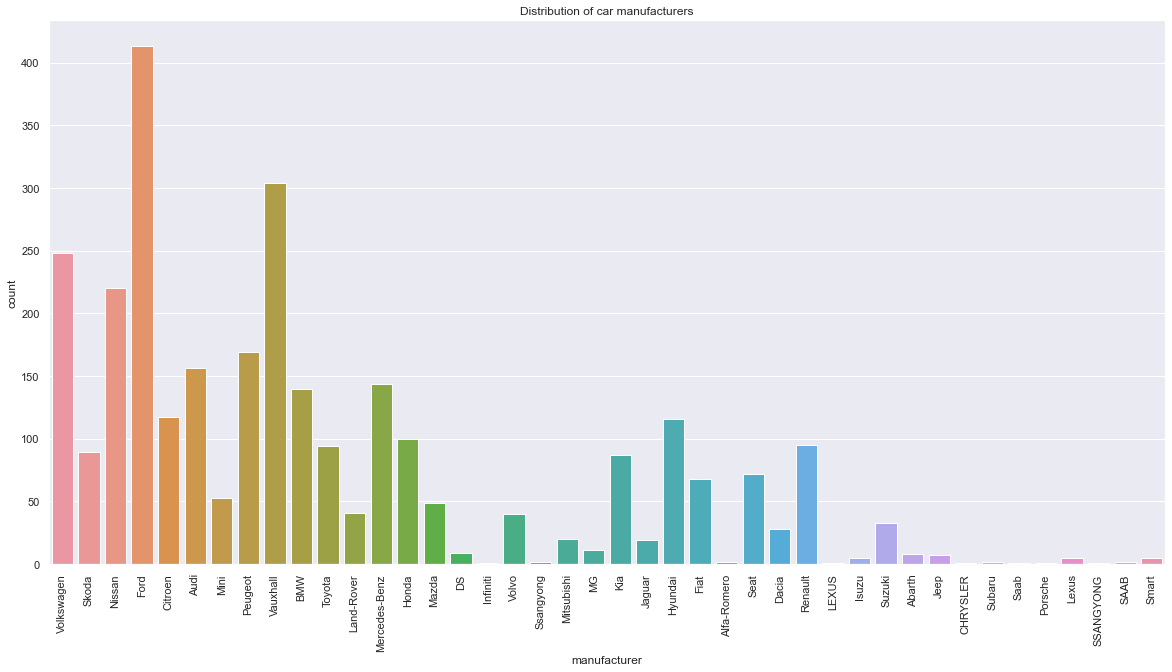

In [182]:
fig = plt.figure(figsize=(20, 10))
sns.countplot(df.manufacturer);
plt.title("Distribution of car manufacturers")
plt.xticks(rotation=90)
plt.savefig('distribution-of-car-manufacturers.png')

This graph shows the total no. of cars manufactured by the car company.

In [183]:
df.manufacturer.value_counts()

Ford             413
Vauxhall         304
Volkswagen       248
Nissan           220
Peugeot          169
Audi             156
Mercedes-Benz    144
BMW              140
Citroen          117
Hyundai          116
Honda            100
Renault           95
Toyota            94
Skoda             89
Kia               87
Seat              72
Fiat              68
Mini              53
Mazda             49
Land-Rover        41
Volvo             40
Suzuki            33
Dacia             28
Mitsubishi        20
Jaguar            19
MG                11
DS                 9
Abarth             8
Jeep               7
Smart              5
Isuzu              5
Lexus              5
SAAB               2
Alfa-Romero        2
Subaru             2
Ssangyong          2
CHRYSLER           1
Porsche            1
Infiniti           1
Saab               1
LEXUS              1
SSANGYONG          1
Name: manufacturer, dtype: int64

this shows the total no. of cars manufactured by the various car company.

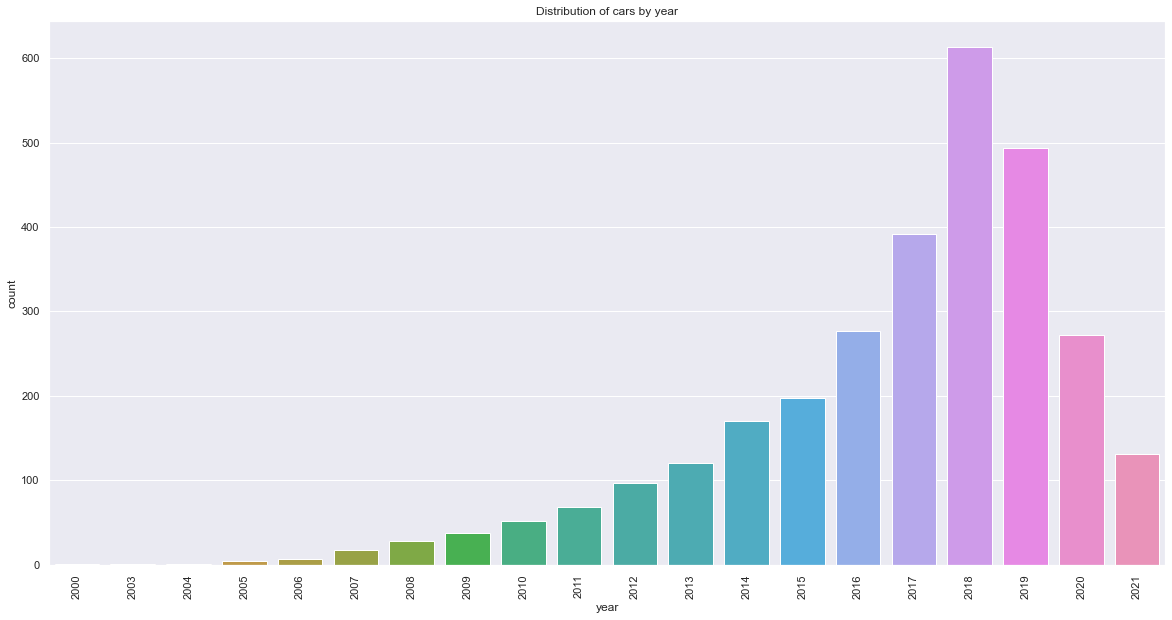

In [184]:
fig = plt.figure(figsize=(20,10))
sns.countplot(df.year)
plt.title("Distribution of cars by year")
plt.xticks(rotation=90);
plt.savefig('distribution-of-car-by-year.png')

this shows the total no. of cars over the years.

Text(0.5, 1.0, 'Distribution of `the years')

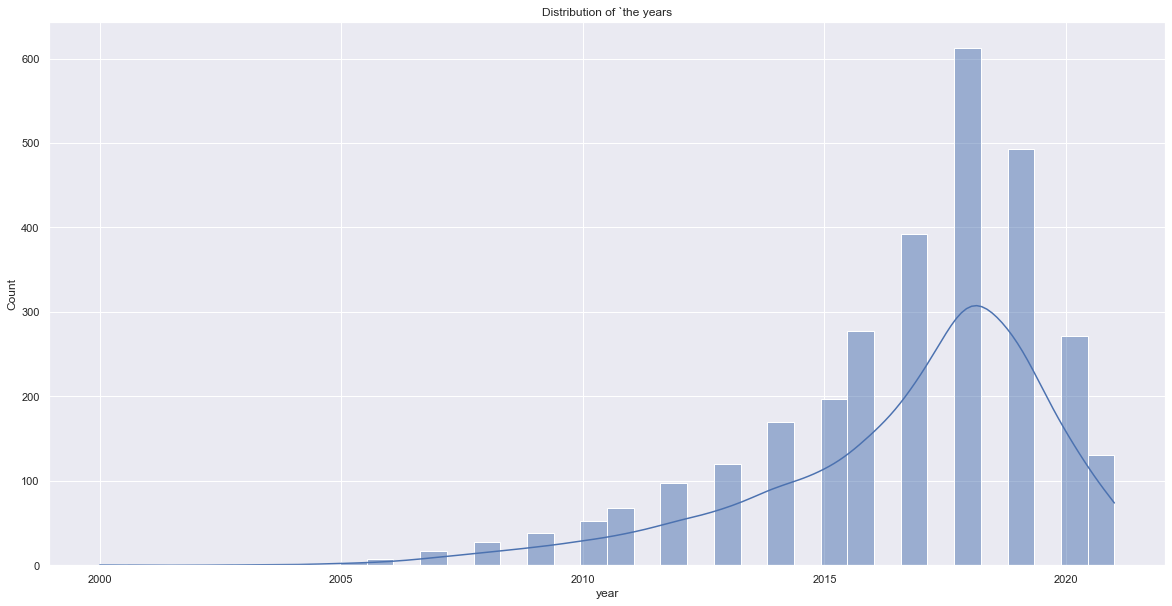

In [185]:
fig = plt.figure(figsize=(20,10))
sns.histplot(data = df, x = 'year', kde = True)
plt.title("Distribution of `the years")

this graph shows the distribution of cars as per year wise collection.

In [186]:
df.year.value_counts()

2018    613
2019    493
2017    392
2016    277
2020    272
2015    197
2014    170
2021    131
2013    120
2012     97
2011     68
2010     52
2009     38
2008     28
2007     17
2006      7
2005      4
2003      1
2004      1
2000      1
Name: year, dtype: int64

this shows the  no. of cars produced in each year.

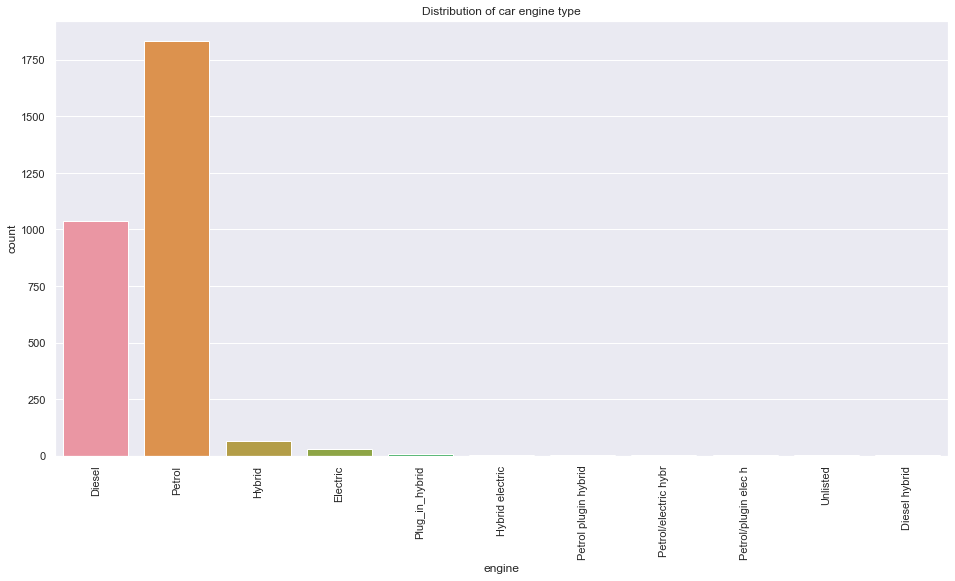

In [187]:
fig = plt.figure(figsize=(16, 8))
sns.countplot(df.engine);
plt.title("Distribution of car engine type")
plt.xticks(rotation=90);
plt.savefig('distribution-of-car-engine-type.png')

this graph shows the engine wise total no. of cars produced.

In [188]:
df.engine.value_counts()

Petrol                  1832
Diesel                  1039
Hybrid                    66
Electric                  27
Plug_in_hybrid             8
Petrol/plugin elec h       2
Petrol/electric hybr       1
Diesel hybrid              1
Petrol plugin hybrid       1
Hybrid electric            1
Unlisted                   1
Name: engine, dtype: int64

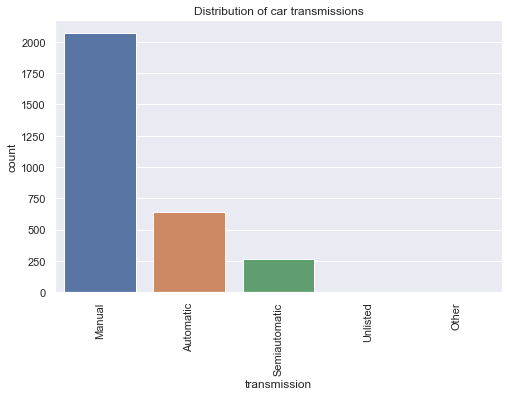

In [189]:
fig = plt.figure(figsize=(8, 5))
sns.countplot(df.transmission);
plt.title("Distribution of car transmissions")
plt.xticks(rotation=90);
plt.savefig('distribution-of-car-transmission.png')

this graph shows the total no. of cars produced by transmission.

In [190]:
df.transmission.value_counts()

Manual           2070
Automatic         643
Semiautomatic     263
Other               2
Unlisted            1
Name: transmission, dtype: int64

In [191]:
pivot_table = df.pivot_table(values='price', index='manufacturer', aggfunc='mean')
result = pivot_table.sort_values('price', ascending = False)
result

,price
manufacturer,
Porsche,24000.000000
Ssangyong,23424.500000
Mercedes-Benz,20162.493056
Jeep,19795.857143
Land-Rover,19179.829268
Isuzu,19060.600000
Volvo,18626.525000
Mitsubishi,18275.450000
Audi,18035.000000


this table shows the avg. price as per car manufacturing companies.

<AxesSubplot:xlabel='age', ylabel='price'>

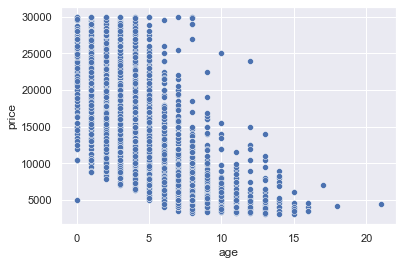

In [192]:
sns.scatterplot(x='age', y='price', data=df)

There is negative correlation between the age and prices of cars. As the age increases, the price reduces.

<AxesSubplot:xlabel='mileage', ylabel='price'>

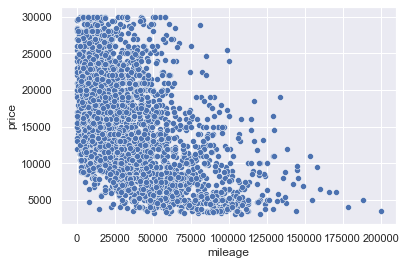

In [193]:
sns.scatterplot(x='mileage', y='price', data=df)

There is negative correlation between the mileage and prices of the cars. As the number of miles travelled increases, the price reduces.

<AxesSubplot:xlabel='mileage', ylabel='price'>

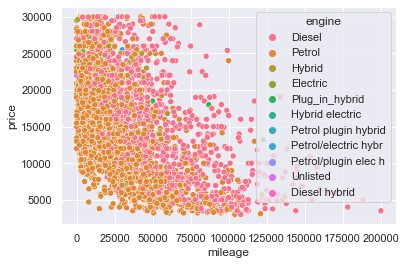

In [194]:
sns.scatterplot(x='mileage', y='price', data=df, hue = 'engine')

There is negative correlation between the mileage and prices of the cars. As the number of miles travelled increases, the price reduces and also shows the engine wise classification of cars.

<AxesSubplot:xlabel='age', ylabel='mileage'>

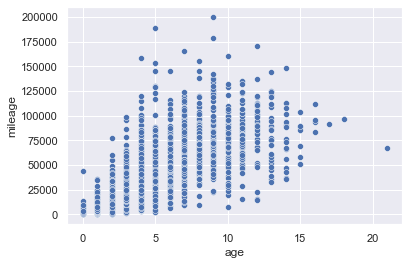

In [195]:
sns.scatterplot(x='age', y='mileage', data=df)

There is a positive correlation between the mileage and age of the cars. the number of miles travelled increases with age.

<AxesSubplot:xlabel='age', ylabel='mileage'>

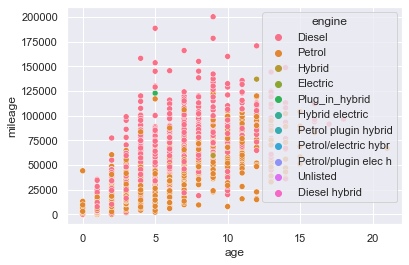

In [196]:
sns.scatterplot(x='age', y='mileage', data=df, hue = 'engine')

this also shows the engine wise positive correlation between age and mileage of cars.

Text(0.5, 1.0, 'Box Plot of Age')

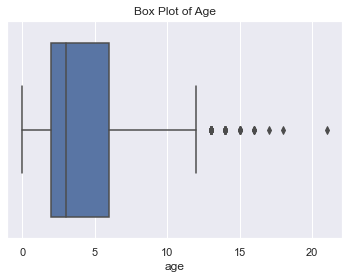

In [197]:
sns.boxplot(x='age', data = df)
plt.title("Box Plot of Age")

There are still outliers in the data but it's fine.



Text(0.5, 1.0, 'Box Plot of Transmission vs Price')

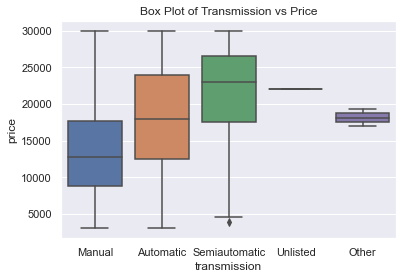

In [198]:
sns.boxplot(x="transmission", y="price", data=df)
plt.title("Box Plot of Transmission vs Price")

this shows price wise transmission of cars.

Text(0.5, 1.0, 'Box Plot of Engine vs Price')

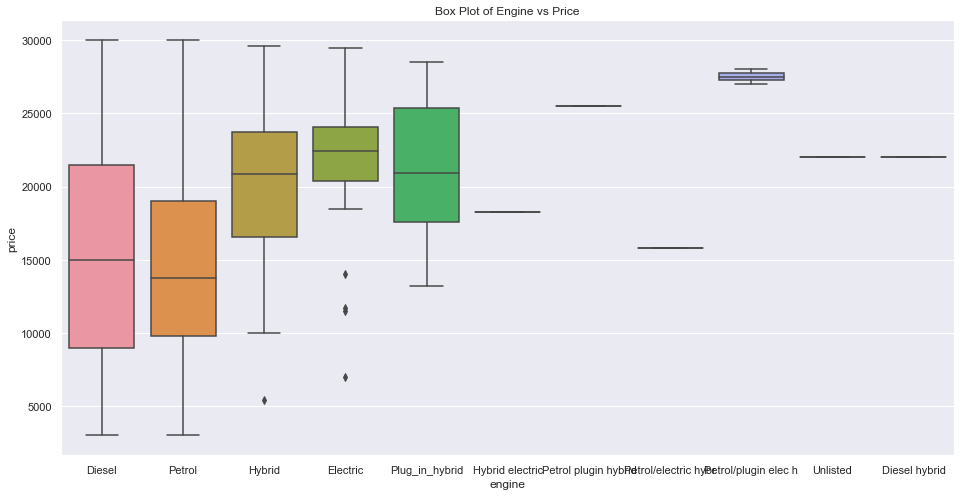

In [202]:
fig = plt.figure(figsize=(16, 8))
sns.boxplot(x="engine", y="price", data=df)
plt.title("Box Plot of Engine vs Price")

this shows the engine wise price pof the cars.

In [200]:
from wordcloud import WordCloud, STOPWORDS

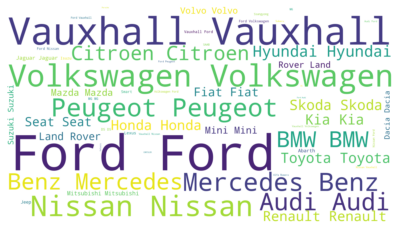

In [201]:
plt.subplots(figsize=(8,4))
wordcloud = WordCloud(background_color='White',width=1920,height=1080).generate(" ".join(df['manufacturer']))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.savefig('cast.png')
plt.show()

This shows the cars manufacturing campany names by using stop words and word cloud.

In [205]:
pip install lightgbm

In [206]:
pip install xgboost

In [207]:
pip install catboost

Note: you may need to restart the kernel to use updated packages.


In [208]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import ExtraTreesRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_absolute_error, accuracy_score, mean_squared_error
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [209]:
df = pd.read_csv('cleaned_car_df.csv')
df.head()

,name,manufacturer,year,age,mileage,engine,transmission,price
0,Volkswagen Polo,Volkswagen,2010,11,83000,Diesel,Manual,3495
1,Volkswagen Caddy,Volkswagen,2011,10,160000,Diesel,Manual,6495
2,Skoda Fabia,Skoda,2011,10,51000,Petrol,Manual,4190
3,Nissan NV200,Nissan,2010,11,107000,Diesel,Manual,4690
4,Ford Transit,Ford,2005,16,93949,Diesel,Manual,3995


In [210]:
df = df.drop(['name', 'year'], axis=1)

In [211]:
df

,manufacturer,age,mileage,engine,transmission,price
0,Volkswagen,11,83000,Diesel,Manual,3495
1,Volkswagen,10,160000,Diesel,Manual,6495
2,Skoda,10,51000,Petrol,Manual,4190
3,Nissan,11,107000,Diesel,Manual,4690
4,Ford,16,93949,Diesel,Manual,3995
...,...,...,...,...,...,...
2974,Citroen,8,71000,Diesel,Manual,4995
2975,BMW,9,108899,Diesel,Automatic,6690
2976,Audi,8,71700,Petrol,Semiautomatic,9995
2977,Audi,12,64787,Diesel,Automatic,11990


here we have removed the name and year columns with were irrelevant for model building.

In [212]:
df['manufacturer'].unique()

array(['Volkswagen', 'Skoda', 'Nissan', 'Ford', 'Citroen', 'Audi', 'Mini',
       'Peugeot', 'Vauxhall', 'BMW', 'Toyota', 'Land-Rover',
       'Mercedes-Benz', 'Honda', 'Mazda', 'DS', 'Infiniti', 'Volvo',
       'Ssangyong', 'Mitsubishi', 'MG', 'Kia', 'Jaguar', 'Hyundai',
       'Fiat', 'Alfa-Romero', 'Seat', 'Dacia', 'Renault', 'LEXUS',
       'Isuzu', 'Suzuki', 'Abarth', 'Jeep', 'CHRYSLER', 'Subaru', 'Saab',
       'Porsche', 'Lexus', 'SSANGYONG', 'SAAB', 'Smart'], dtype=object)

In [214]:
le_manufacturer = LabelEncoder()
le_engine = LabelEncoder()
le_transmission = LabelEncoder()

In [215]:
df['manufacturer'] = le_manufacturer.fit_transform(df['manufacturer'])
df['engine'] = le_engine.fit_transform(df['engine'])
df['transmission'] = le_transmission.fit_transform(df['transmission'])

In [216]:
df.head(10)

,manufacturer,age,mileage,engine,transmission,price
0,40,11,83000,0,1,3495
1,40,10,160000,0,1,6495
2,33,10,51000,5,1,4190
3,25,11,107000,0,1,4690
4,9,16,93949,0,1,3995
5,5,11,46000,0,1,5985
6,2,9,138000,0,1,4499
7,2,11,103000,0,1,5999
8,23,6,47074,5,0,12495
9,9,10,97289,5,1,4495


In [218]:
X = df.drop('price', axis=1)
y = np.log(df['price'])

In [219]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [220]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2085, 5), (894, 5), (2085,), (894,))

In [221]:
# feature scale the X_train and X_test values

norm = MinMaxScaler().fit(X_train)

# transform training data
X_train = norm.transform(X_train)

# transform testing data
X_test = norm.transform(X_test)

print(X_train)
print('\n')
print(X_test)

[[0.26829268 0.14285714 0.10823839 0.         0.33333333]
 [0.97560976 0.0952381  0.04240823 0.55555556 0.        ]
 [0.07317073 0.23809524 0.17282477 0.         1.        ]
 ...
 [0.97560976 0.04761905 0.09320319 0.55555556 1.        ]
 [0.2195122  0.14285714 0.15903335 0.         0.33333333]
 [0.95121951 0.23809524 0.41377743 0.         0.33333333]]


[[0.56097561 0.28571429 0.08162959 0.55555556 0.33333333]
 [0.68292683 0.0952381  0.08989645 0.         0.33333333]
 [0.63414634 0.19047619 0.06685415 0.55555556 1.        ]
 ...
 [0.2195122  0.52380952 0.45953236 0.55555556 0.33333333]
 [0.24390244 0.0952381  0.05397683 0.55555556 0.        ]
 [0.95121951 0.28571429 0.24707663 0.55555556 0.33333333]]


In [222]:
# Fitting extra trees regressor

etr = ExtraTreesRegressor(random_state = 123 , max_depth = 45  , n_estimators = 400)
etr.fit(X_train,y_train)

ExtraTreesRegressor(max_depth=45, n_estimators=400, random_state=123)

In [223]:
#Fitting light gbm model on the train data

lgbm = LGBMRegressor(random_state = 123 ,  num_leaves = 750 , learning_rate = 0.01, max_bin = 1200 , n_estimators = 1000)
lgbm.fit(X_train,y_train)

LGBMRegressor(learning_rate=0.01, max_bin=1200, n_estimators=1000,
              num_leaves=750, random_state=123)

In [224]:
#Fitting xgboost regressor model on the train data

xgb = XGBRegressor(random_state = 123 , max_depth = 7 , learning_rate = 0.2 , n_estimators = 1500)
xgb.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.2, max_delta_step=0, max_depth=7,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=1500, n_jobs=8, num_parallel_tree=1, random_state=123,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [225]:
#Fitting random forest regressor model on the train data

rf = RandomForestRegressor(random_state = 123 , max_depth = 45 , n_estimators = 600)
rf.fit(X_train,y_train)

RandomForestRegressor(max_depth=45, n_estimators=600, random_state=123)

In [226]:
#Fitting catboost regressor model on the train data

cat = CatBoostRegressor(random_state = 123  , max_depth = 14 )
cat.fit(X_train,y_train, verbose = False)

In [227]:
train_score = pd.DataFrame({
    'model': ['ExtraTreesRegressor', 'LGBMRegressor', 'XGBRegressor', 'RandomForestRegressor', 'CatBoostRegressor'],
    
    'score': [etr.score(X_train, y_train), lgbm.score(X_train, y_train),
                xgb.score(X_train, y_train) , rf.score(X_train, y_train),
                cat.score(X_train, y_train)]
    })
train_score

,model,score
0,ExtraTreesRegressor,0.999158
1,LGBMRegressor,0.905883
2,XGBRegressor,0.999025
3,RandomForestRegressor,0.959118
4,CatBoostRegressor,0.959854


In [228]:
etr_pred = etr.predict(X_test)
lgbm_pred = lgbm.predict(X_test)
xgb_pred = xgb.predict(X_test)
rf_pred = rf.predict(X_test)
cat_pred = cat.predict(X_test)

In [229]:
best_model = pd.DataFrame({
    'model': ['ExtraTreesRegressor', 'LGBMRegressor', 'XGBRegressor', 'RandomForestRegressor', 'CatBoostRegressor'],
    
    'mae': [mean_absolute_error(y_test, etr_pred), mean_absolute_error(y_test, lgbm_pred),
           mean_absolute_error(y_test, xgb_pred), mean_absolute_error(y_test, rf_pred),
           mean_absolute_error(y_test, cat_pred)],
    
    'mse': [mean_squared_error(y_test, etr_pred), mean_squared_error(y_test, lgbm_pred),
            mean_squared_error(y_test, xgb_pred), mean_squared_error(y_test, rf_pred),
            mean_squared_error(y_test, cat_pred)],
    
    'rmse': [(np.sqrt(metrics.mean_squared_error(y_test, etr_pred))),(np.sqrt(metrics.mean_squared_error(y_test, lgbm_pred))),
             (np.sqrt(metrics.mean_squared_error(y_test, xgb_pred))), (np.sqrt(metrics.mean_squared_error(y_test, rf_pred))),
             (np.sqrt(metrics.mean_squared_error(y_test, cat_pred)))]
})
best_model

,model,mae,mse,rmse
0,ExtraTreesRegressor,0.232172,0.094566,0.307515
1,LGBMRegressor,0.210049,0.072385,0.269045
2,XGBRegressor,0.224785,0.082715,0.287602
3,RandomForestRegressor,0.215135,0.078738,0.280603
4,CatBoostRegressor,0.202530,0.069940,0.264462


The CatBoost Regressor has the lowest MAE and RMSE, so it is the chosen model.

In [230]:
grid = {'max_depth': [3,4,5],'n_estimators':[100, 200, 300]}
model = GridSearchCV (estimator = cat, param_grid = grid, scoring ='neg_root_mean_squared_error', cv = 5)

In [231]:
model.fit(X_train,y_train, verbose = False)

GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostRegressor object at 0x000002A77AD8CF70>,
             param_grid={'max_depth': [3, 4, 5],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_root_mean_squared_error')

In [232]:
y_pred = model.predict(X_test)

In [233]:
grid_model = pd.DataFrame({
    'model': ['CatBoost Regressor'],
    'mae': [mean_absolute_error(y_test, y_pred)],
    'mse': [mean_squared_error(y_test, y_pred)],
    'rmse': [np.sqrt(metrics.mean_squared_error(y_test, y_pred))]
    })
grid_model

,model,mae,mse,rmse
0,CatBoost Regressor,0.200648,0.065071,0.25509


# Make prediction for new data

In [234]:
new_data = [['Mercedes-Benz', 2, 12340, 'Petrol', 'Automatic']]
# convert to array
new_data = np.array(new_data)
new_data

array([['Mercedes-Benz', '2', '12340', 'Petrol', 'Automatic']],
      dtype='<U13')

In [235]:
new_data[:,0] = le_manufacturer.transform(new_data[:,0])
new_data[:,3] = le_engine.transform(new_data[:,3])
new_data[:,4] = le_transmission.transform(new_data[:,4])
new_data

array([['22', '2', '12340', '5', '0']], dtype='<U13')

In [236]:
new_data = norm.transform(new_data)
new_data

array([[0.53658537, 0.0952381 , 0.0616243 , 0.55555556, 0.        ]])

In [237]:
# make predictions
price = model.predict(new_data)
# convert the price from log_price to actual price
act_price = np.exp(price) + 1
act_price = round(act_price[0])  # round to the neaarest pounds

print(f"The estimated cost of the car is {act_price:,} pounds")

The estimated cost of the car is 23,048 pounds
